In [1]:
# Example data
library(microbiome)
library(dplyr)
library(phyloseq)
library("qiime2R")

Loading required package: phyloseq

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: 'microbiome'


The following object is masked from 'package:ggplot2':

    alpha


The following object is masked from 'package:base':

    transform



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [26]:
### Define variables
det    = 0.005 #detection
prev   = 0.5  #prevalance
Group  = c("genotype_and_donor_status") #group to compare
x_axis_title = "Genotype and donor status" #group names

In [27]:
setwd('/Users/alchemist/Aakash/BonnGut/Microbiome_pipeline')
workdir = getwd()

In [28]:
#
pseq<-qza_to_phyloseq(
    features=paste(workdir,"/feature_table/table.qza",sep=""),
    tree=paste(workdir,"/phylo_tree/rooted_tree.qza",sep=""),
         paste(workdir,"/taxonomy/tax_ezbiocloud.qza",sep=""),
    paste(workdir,"/metadata/metadata.tsv",sep="")
    )

In [29]:
head(sample_data(pseq))

,barcode,mouse_id,genotype,cage_id,donor,donor_status,days_post_transplant,genotype_and_donor_status
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
recip.220.WT.OB1.D7,CCTCCGTCATGG,457,wild type,C35,hc_1,Healthy,49,wild type and Healthy
recip.290.ASO.OB2.D1,AACAGTAAACAA,456,susceptible,C35,hc_1,Healthy,49,susceptible and Healthy
recip.389.WT.HC2.D21,ATGTATCAATTA,435,susceptible,C31,hc_1,Healthy,21,susceptible and Healthy
recip.391.ASO.PD2.D14,GTCAGTATGGCT,435,susceptible,C31,hc_1,Healthy,14,susceptible and Healthy
recip.391.ASO.PD2.D21,AGACAGTAGGAG,437,susceptible,C31,hc_1,Healthy,21,susceptible and Healthy
recip.391.ASO.PD2.D7,GGTCTTAGCACC,435,susceptible,C31,hc_1,Healthy,7,susceptible and Healthy


In [30]:
# Calculate compositional version of the data
# (relative abundances)
pseq.rel <- microbiome::transform(pseq, "compositional")

## Exploration at Phylum Level 

[1] "genotype_and_donor_status"


Saving 7 x 7 in image

Saving 7 x 7 in image



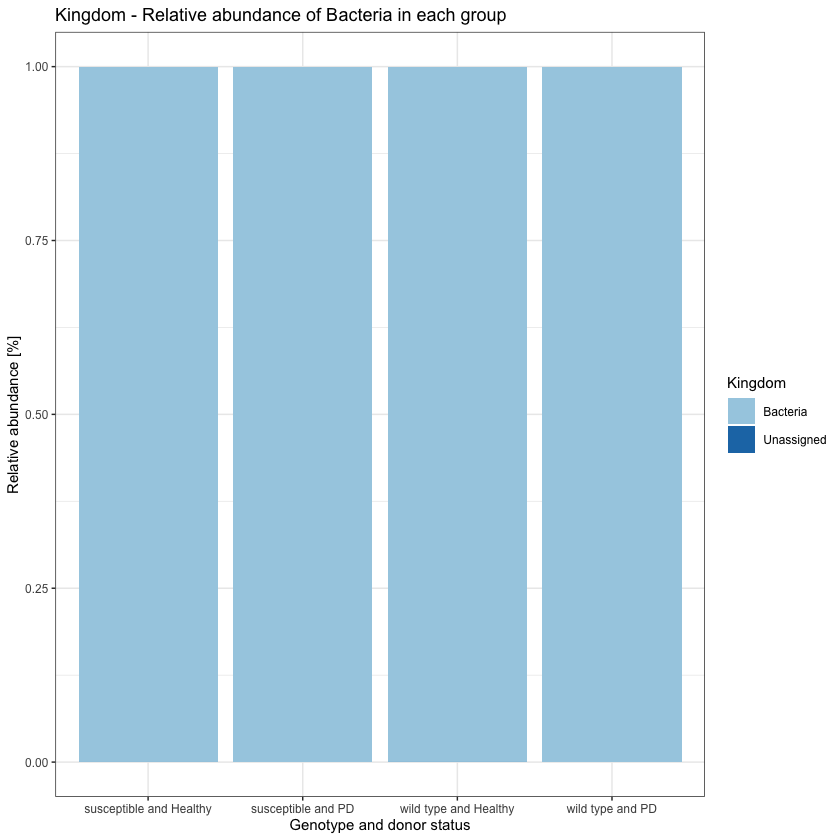

Saving 7 x 7 in image



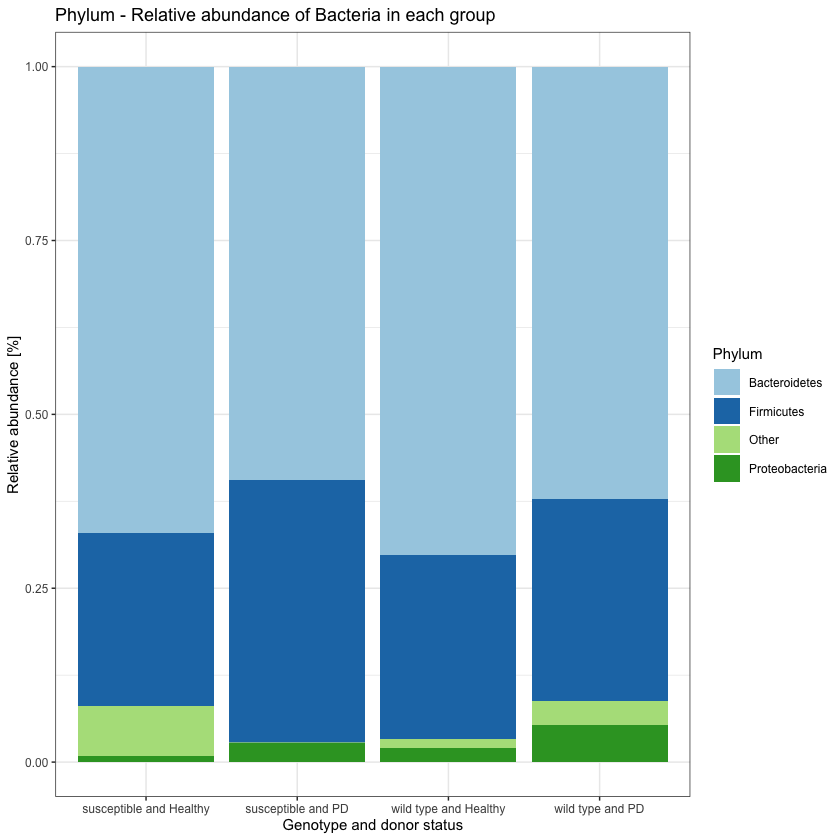

Saving 7 x 7 in image



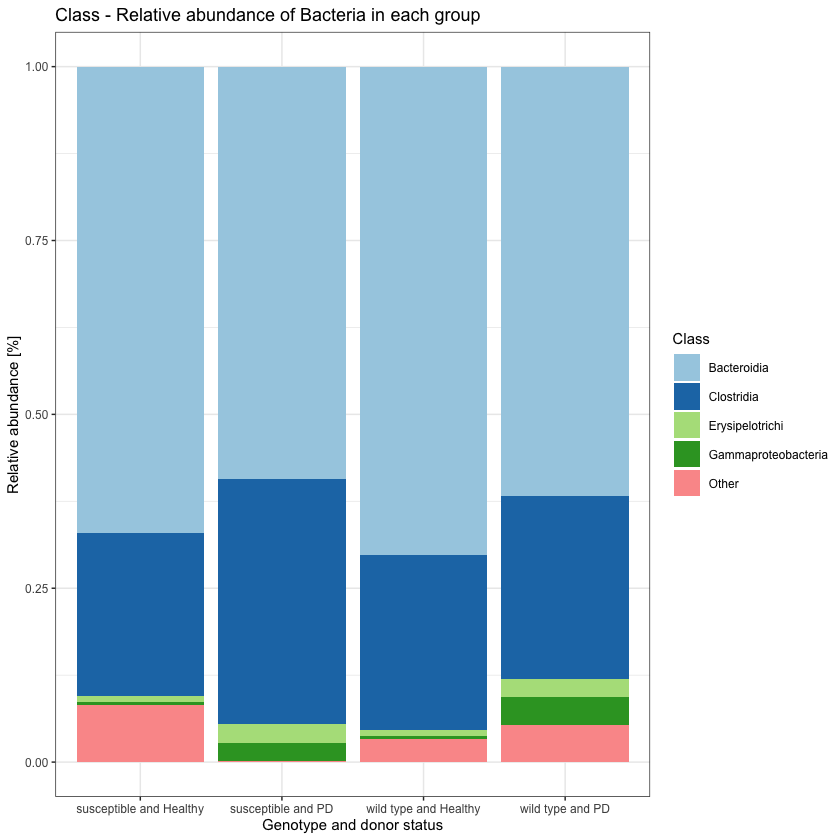

Saving 7 x 7 in image



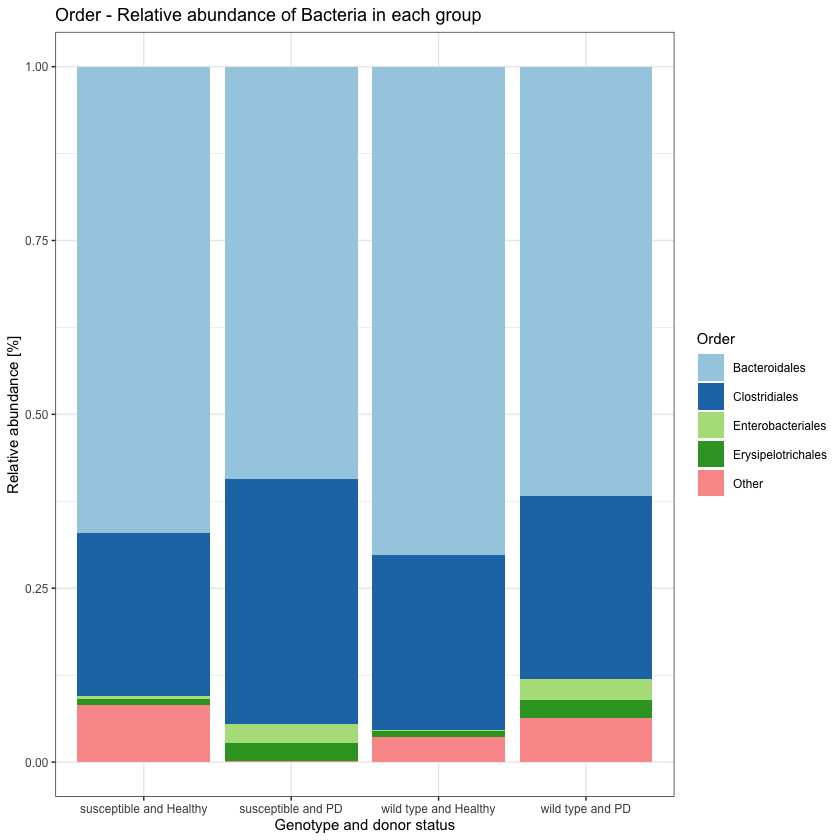

Saving 7 x 7 in image



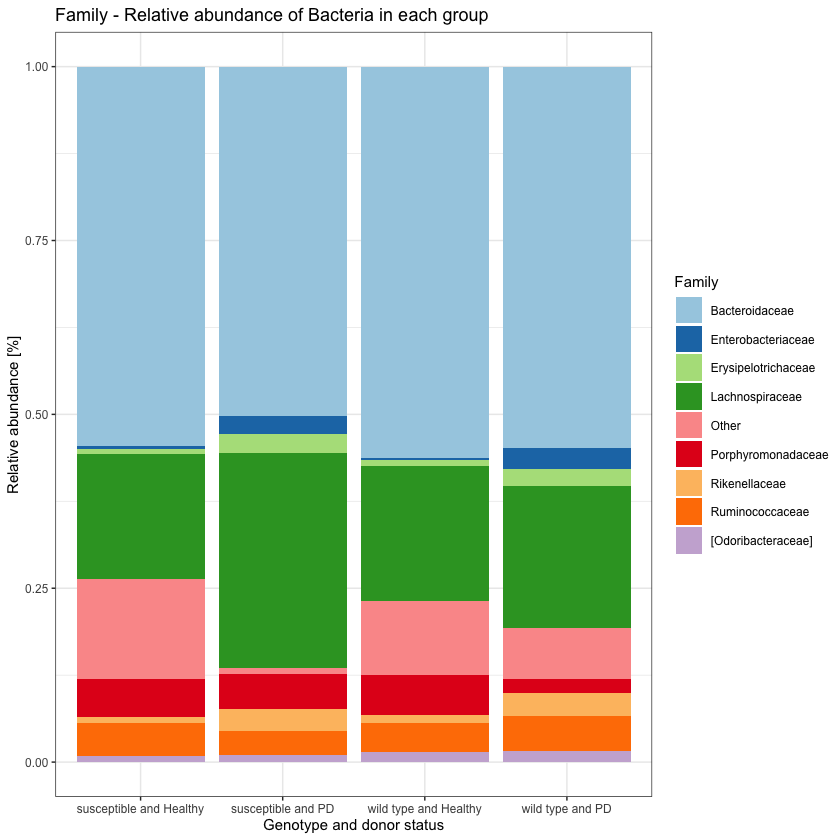

Saving 7 x 7 in image



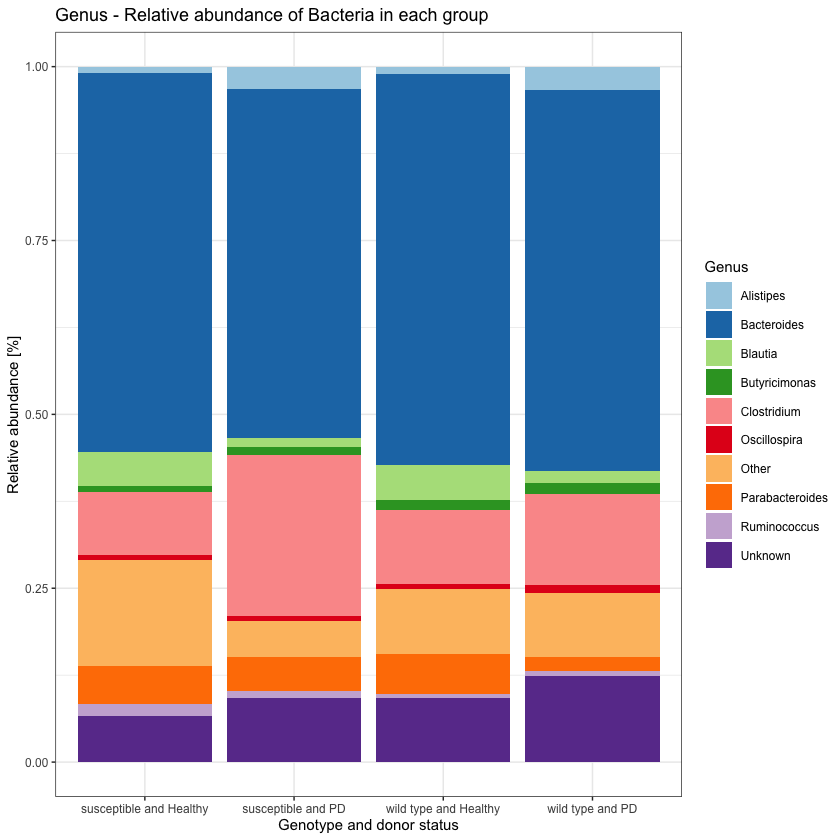

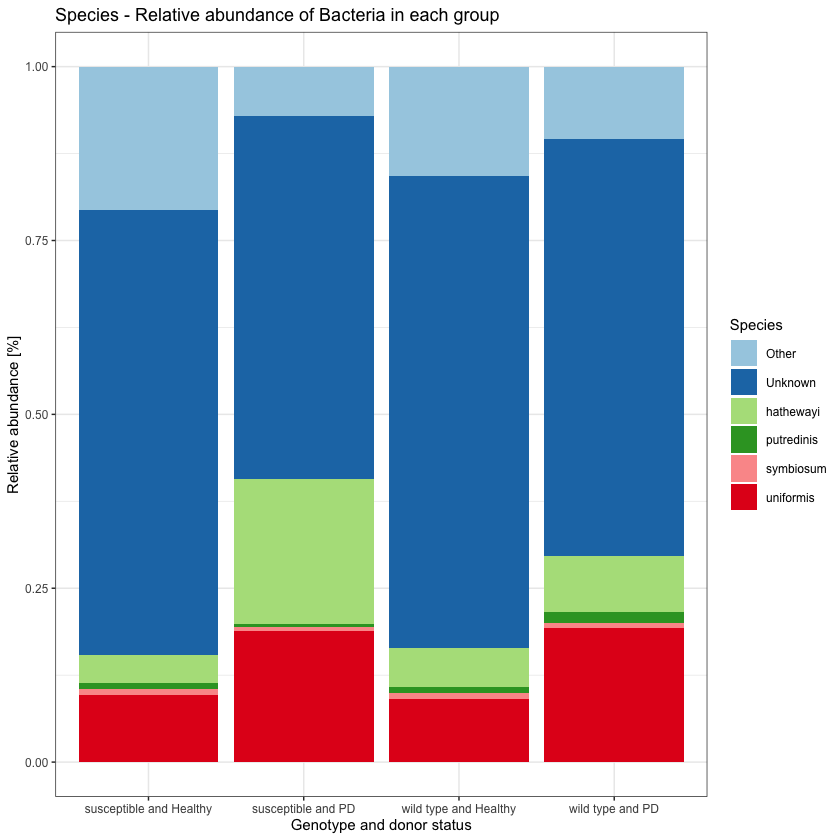

In [35]:
for (g in Group)
    {
    print(g)
    for (r in c(rank_names(pseq)))
        {
        # Aggregrating and taking core
        pseq.fam.rel <-aggregate_rare(pseq.rel, level = r, detection = det, prevalence = prev)
        #
        p <- plot_composition(pseq.fam.rel,
                              average_by = g) + 
          guides(fill = guide_legend(ncol = 1)) + 
          labs(x = x_axis_title, 
               y = "Relative abundance [%]",
               title = paste(r,"-","Relative abundance of Bacteria in each group") )
        print(p + scale_fill_brewer(r, palette = "Paired") + theme_bw(base_size = 9))
        ggsave(paste(workdir,"/taxonomy_exploration/taxonomy_bar_plots/tax_bar_plot_for_rank_",r,"_groupby_",g,".png",sep=""))
        }
    }